### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
A. Which variables are significant in predicting the price of a house, and
B. How well those variables describe the price of a house.

### Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [2242]:
import os
#os.getcwd()
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import sklearn
import scipy.integrate as integrate
import scipy
from math import *

import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [2137]:
housing_ds = pd.read_csv('AUS_housing_data.csv')
housing_ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2138]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Pre-processing

In [2139]:
housing_ds.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Columns with null values -- Let us first look at these columns
LotFrontage       259<br>
Alley            1369<br>
MasVnrType        872<br>
BsmtQual           37<br>
BsmtCond           37<br>
BsmtExposure       38<br>
BsmtFinType1       37<br>
BsmtFinType2       38<br>
Electrical          1<br>
FireplaceQu       690<br>
GarageType         81<br>
GarageYrBlt        81<br>
GarageFinish       81<br>
GarageQual         81<br>
GarageCond         81<br>
PoolQC           1453<br>
Fence            1179<br>
MiscFeature      1406<br>

In [2140]:
housing_ds['MSSubClass'].dtype

dtype('int64')

In [2141]:
housing_ds['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

#### Intention of writing these categorical classes, is to say this column is categorical datatype and not int64
20 -->    536 (1-STORY 1946 & NEWER ALL STYLES)<br>
60 -->    299 (2-STORY 1946 & NEWER)<br>
50 -->     144 (1-1/2 STORY FINISHED ALL AGES)<br>
120 -->     87 (1-STORY PUD (Planned Unit Development) - 1946 & NEWER)<br>
30 -->    69 (1-STORY 1945 & OLDER)<br>
160 -->     63 (2-STORY PUD - 1946 & NEWER)<br>
70 -->      60 (2-STORY 1945 & OLDER)<br>
80 -->      58 (SPLIT OR MULTI-LEVEL)<br>
90 -->      52 (DUPLEX - ALL STYLES AND AGES)<br>
190 -->     30 (2 FAMILY CONVERSION - ALL STYLES AND AGES)<br>
85 -->      20 (SPLIT FOYER)<br>
75 -->      16 (2-1/2 STORY ALL AGES)<br>
45 -->      12 (1-1/2 STORY - UNFINISHED ALL AGES)<br>
180 -->     10 (PUD - MULTILEVEL - INCL SPLIT LEV/FOYER)<br>
40 -->       4 (1-STORY W/FINISHED ATTIC ALL AGES)<br>

In [2142]:
housing_ds['MSSubClass'] = housing_ds['MSSubClass'].astype('object')
housing_ds['MSSubClass'].dtype

dtype('O')

In [2143]:
housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2144]:
housing_ds['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

#### we see 17% null values in this column 'LotFrontage' and filling them with median

In [2145]:
housing_ds['LotFrontage'].isnull().sum()

259

In [2146]:
(housing_ds['LotFrontage'].isnull().sum()/len(housing_ds['LotFrontage']))*100

17.73972602739726

In [2147]:
housing_ds['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [2148]:
housing_ds['LotFrontage'] = housing_ds['LotFrontage'].fillna(housing_ds['LotFrontage'].median())
housing_ds['LotFrontage'].isnull().sum()

0

#### Alley column has 93% values as null, we can ignore this column, dropping it

In [2149]:
housing_ds['Alley'].dtype

dtype('O')

In [2150]:
housing_ds['Alley'].isnull().sum()

1369

In [2151]:
(housing_ds['Alley'].isnull().sum()/len(housing_ds['Alley']))*100

93.76712328767123

In [2152]:
housing_ds.drop('Id',axis=1,inplace=True)
housing_ds.drop('Alley',axis=1,inplace=True)
housing_ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### MasVnrType column has 59% percent of data null values, still considering this column and using mode() imputing the null values

In [2153]:
housing_ds['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [2154]:
housing_ds['MasVnrType'].isnull().sum()

872

In [2155]:
(housing_ds['MasVnrType'].isnull().sum()/len(housing_ds['MasVnrType']))*100

59.726027397260275

In [2156]:
mode_value = housing_ds['MasVnrType'].mode()[0]
# Replace NaN values with the mode
housing_ds['MasVnrType'] = housing_ds['MasVnrType'].fillna(mode_value)
housing_ds['MasVnrType'].isnull().sum()

0

### BsmtQual column has about 2.5% values null, being categorical, imputing with mode()

In [2157]:
housing_ds['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [2158]:
housing_ds['BsmtQual'].isnull().sum()

37

In [2159]:
(housing_ds['BsmtQual'].isnull().sum()/len(housing_ds['BsmtQual']))*100

2.5342465753424657

In [2160]:
mode_value = housing_ds['BsmtQual'].mode()[0]
# Replace NaN values with the mode
housing_ds['BsmtQual'] = housing_ds['BsmtQual'].fillna(mode_value)
housing_ds['BsmtQual'].isnull().sum()

0

### BsmtCond column has about 2.5% values null, being categorical, imputing with mode()

In [2161]:
housing_ds['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [2162]:
housing_ds['BsmtCond'].isnull().sum()

37

In [2163]:
(housing_ds['BsmtCond'].isnull().sum()/len(housing_ds['BsmtCond']))*100

2.5342465753424657

In [2164]:
mode_value = housing_ds['BsmtCond'].mode()[0]
# Replace NaN values with the mode
housing_ds['BsmtCond'] = housing_ds['BsmtCond'].fillna(mode_value)
housing_ds['BsmtCond'].isnull().sum()

0

### BsmtExposure column has about 2.6% values null, being categorical, imputing with mode()

In [2165]:
housing_ds['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [2166]:
housing_ds['BsmtExposure'].isnull().sum()

38

In [2167]:
(housing_ds['BsmtExposure'].isnull().sum()/len(housing_ds['BsmtExposure']))*100

2.6027397260273974

In [2168]:
mode_value = housing_ds['BsmtExposure'].mode()[0]
# Replace NaN values with the mode
housing_ds['BsmtExposure'] = housing_ds['BsmtExposure'].fillna(mode_value)
housing_ds['BsmtExposure'].isnull().sum()

0

### BsmtFinType1 column has about 2.5% values null, being categorical, imputing with mode()

In [2169]:
housing_ds['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [2170]:
housing_ds['BsmtFinType1'].isnull().sum()

37

In [2171]:
(housing_ds['BsmtFinType1'].isnull().sum()/len(housing_ds['BsmtFinType1']))*100

2.5342465753424657

In [2172]:
mode_value = housing_ds['BsmtFinType1'].mode()[0]
# Replace NaN values with the mode
housing_ds['BsmtFinType1'] = housing_ds['BsmtFinType1'].fillna(mode_value)
housing_ds['BsmtFinType1'].isnull().sum()

0

### BsmtFinType2 column has about 2.6% values null, being categorical, imputing with mode()

In [2173]:
housing_ds['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [2174]:
housing_ds['BsmtFinType2'].isnull().sum()

38

In [2175]:
(housing_ds['BsmtFinType2'].isnull().sum()/len(housing_ds['BsmtFinType2']))*100

2.6027397260273974

In [2176]:
mode_value = housing_ds['BsmtFinType2'].mode()[0]
# Replace NaN values with the mode
housing_ds['BsmtFinType2'] = housing_ds['BsmtFinType2'].fillna(mode_value)
housing_ds['BsmtFinType2'].isnull().sum()

0

### Electrical has just row with null value, mode() imputation been done

In [2177]:
housing_ds['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [2178]:
housing_ds['Electrical'].isnull().sum()

1

In [2179]:
mode_value = housing_ds['Electrical'].mode()[0]
# Replace NaN values with the mode
housing_ds['Electrical'] = housing_ds['Electrical'].fillna(mode_value)
housing_ds['Electrical'].isnull().sum()

0

### FireplaceQu has 47% values as null, imputing with mode() in these values

In [2180]:
housing_ds['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [2181]:
housing_ds['FireplaceQu'].isnull().sum()

690

In [2182]:
(housing_ds['FireplaceQu'].isnull().sum()/len(housing_ds['FireplaceQu']))*100

47.26027397260274

In [2183]:
housing_ds['FireplaceQu'] = housing_ds['FireplaceQu'].fillna(housing_ds['FireplaceQu'].mode()[0])
housing_ds['FireplaceQu'].isnull().sum()

0

### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond all these columns has 81 null values and are categorical datatypes, imputing with mode()
### GarageYrBlt is of float type, but has categorical year data, converting the column and imputing the null values

In [2184]:
housing_ds['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4


In [2185]:
housing_ds['GarageYrBlt'] = housing_ds['GarageYrBlt'].astype('object')
housing_ds['GarageYrBlt'].dtype

dtype('O')

In [2186]:
# GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond
housing_ds['GarageType'] = housing_ds['GarageType'].fillna(housing_ds['GarageType'].mode()[0])
housing_ds['GarageYrBlt'] = housing_ds['GarageYrBlt'].fillna(housing_ds['GarageYrBlt'].mode()[0])
housing_ds['GarageFinish'] = housing_ds['GarageFinish'].fillna(housing_ds['GarageFinish'].mode()[0])
housing_ds['GarageQual'] = housing_ds['GarageQual'].fillna(housing_ds['GarageQual'].mode()[0])
housing_ds['GarageCond'] = housing_ds['GarageCond'].fillna(housing_ds['GarageCond'].mode()[0])

# checking the null value counts after imputing
print(housing_ds['GarageType'].isnull().sum())
print(housing_ds['GarageYrBlt'].isnull().sum())
print(housing_ds['GarageFinish'].isnull().sum())
print(housing_ds['GarageQual'].isnull().sum())
print(housing_ds['GarageCond'].isnull().sum())

0
0
0
0
0


### PoolQC has 99% values as null, dropping this column

In [2187]:
housing_ds['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [2188]:
(housing_ds['PoolQC'].isnull().sum()/len(housing_ds['PoolQC']))*100

99.52054794520548

In [2189]:
housing_ds.drop('PoolQC',axis=1,inplace=True)
housing_ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


### Fence has 80% values as null, dropping this column

In [2190]:
housing_ds['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [2191]:
(housing_ds['Fence'].isnull().sum()/len(housing_ds['Fence']))*100

80.75342465753424

In [2192]:
housing_ds.drop('Fence',axis=1,inplace=True)
housing_ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


### MiscFeature has 96% missing values, no data was collected, lets drop this column

In [2193]:
(housing_ds['MiscFeature'].isnull().sum()/len(housing_ds['MiscFeature']))*100

96.30136986301369

In [2194]:
housing_ds.drop('MiscFeature',axis=1,inplace=True)
housing_ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### MasVnrArea

In [2195]:
housing_ds['MasVnrArea'].isnull().sum()

8

In [2196]:
housing_ds['MasVnrArea'] = housing_ds['MasVnrArea'].fillna(housing_ds['LotFrontage'].median())
housing_ds['MasVnrArea'].isnull().sum()

0

### checking for null values, in the entire dataset, no more null values, all good

In [2197]:
housing_ds.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [2198]:
housing_ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### check for Date/Year columns and find the years age as int

In [2199]:
from datetime import datetime
current_year = datetime.now().year
housing_ds['GarageYrBlt'] = housing_ds['GarageYrBlt'].astype(int)

housing_ds['YearBuilt_age'] = current_year - housing_ds['YearBuilt']
housing_ds['YearRemodAdd_age'] = current_year - housing_ds['YearRemodAdd']
housing_ds['GarageYrBlt_age'] = current_year - housing_ds['GarageYrBlt']
housing_ds['YrSold_age'] = current_year - housing_ds['YrSold']

columns_to_drop = ['YearBuilt', 'YearRemodAdd', 'YrSold','GarageYrBlt']
housing_ds.drop(columns=columns_to_drop, axis=1, inplace=True)

In [2200]:
housing_ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,21,21,21,16
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,48,48,48,17
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,23,22,23,16
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,109,54,26,18
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,24,24,24,16


In [2201]:
housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   LotShape          1460 non-null   object 
 6   LandContour       1460 non-null   object 
 7   Utilities         1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   int64  
 16  OverallCond       1460 non-null   int64  


### looking at boxplots for numeric columns

In [2202]:
numeric_features = housing_ds.select_dtypes(exclude=['object'])
y_column = 'SalePrice'
numeric_features.drop('SalePrice',axis=1,inplace=True)
plot_features = numeric_features.columns
plot_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YearBuilt_age', 'YearRemodAdd_age', 'GarageYrBlt_age',
       'YrSold_age'],
      dtype='object')

In [2203]:
import math
def draw_scatterplots(dataframe, feature_list, target):
    sns.set(style="ticks")
    num_features = len(feature_list)
    num_rows = math.ceil(num_features / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))

    for i, (feature, ax) in enumerate(zip(feature_list, axes.flatten())):
        sns.scatterplot(x=feature, y=target, data=dataframe, ax=ax)
        if i == num_features:  
            break
    plt.tight_layout()
    plt.show()

### few observations looking at the Scatter plots
##### 1. SalePrice increases with OverallQual is increasing
##### 2. SalePrice is very high when the values of Low quality finished square feet (all floors) is low
##### 3. SalePrice is increasing when GarageCars: Size of garage in car capacity is more
##### 4. SalePrice is very high when Pool Area is very less

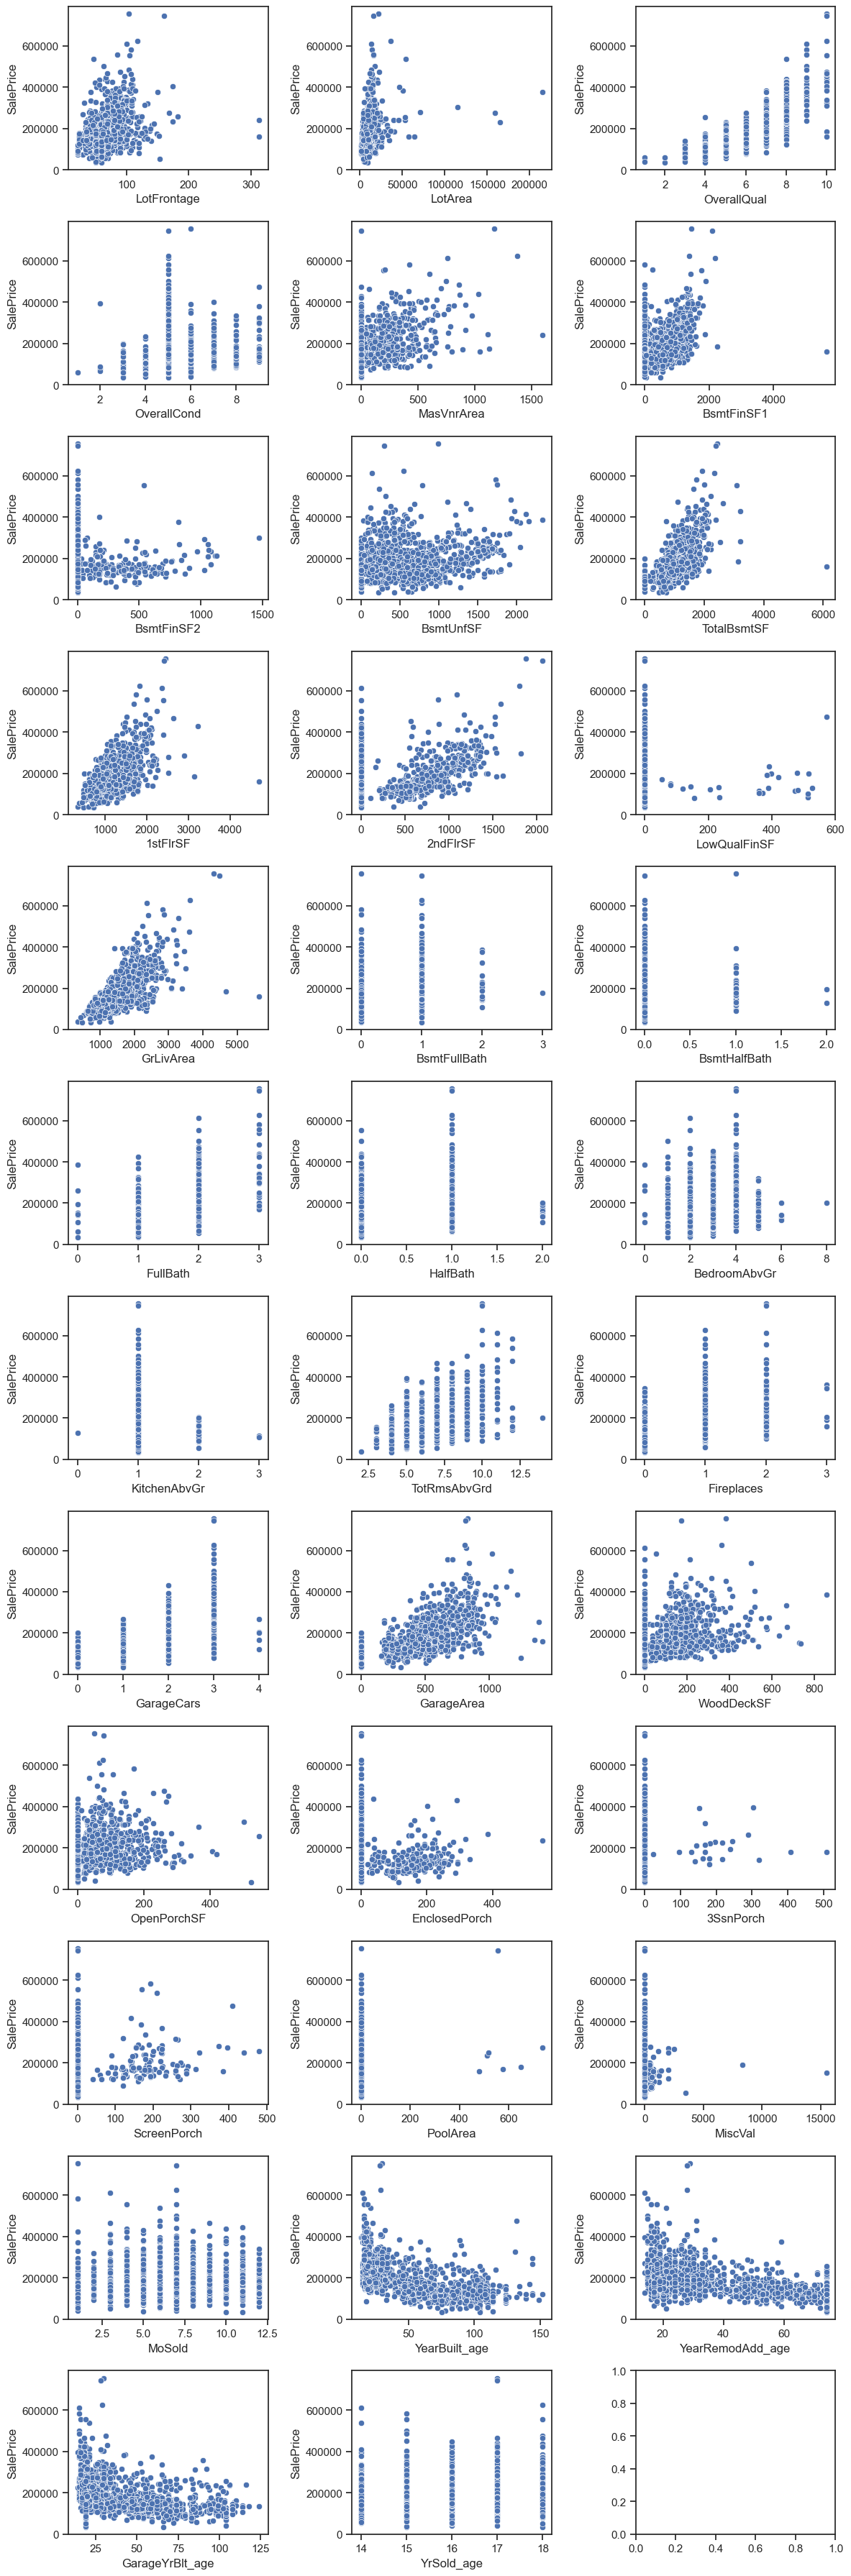

In [2204]:
draw_scatterplots(housing_ds, plot_features, y_column)

### Working with of categorical columns

In [2205]:
categorical_features = housing_ds.select_dtypes(include=['object'])
print('number of catogrical columns ', len(categorical_features.columns),'column names ',categorical_features.columns )

number of catogrical columns  40 column names  Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [2206]:
categorical_features.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### Handling categorical columns:
I would like to make a point here. The dataset has about 40 categorical columns. If these columns are encoded, this will increase the dimensions to a large number, and surely not advisable. I verified in the net on how to reduce the dimensions. The options are to do PCA or more advanced k-means. We are still not there and I am new to them. So there is some text that I could read regarding the handling the categorical based on their class-categories. It said to assess the percentage distribution of class categories within each column. If a category dominates with a very high percentage, its contribution to the model may be minimal. 
<br><br>Let me illustrate this with an example. Suppose we have a feature named 'painting_done' with three classes: 'fully done,' 'partially done,' and 'not done.' If, for instance, 85% of houses are labeled 'fully done,' then this particular column might not contribute significantly to the model, as there is limited variation in the data. The impact would be more pronounced if our focus is on the remaining 10% of houses marked as 'partially done' or 'not done'.

In [2207]:
# I have kept the threshold here as 85%
def getHighValueCounts(housing_data, threshold=0.85):
    columns_to_drop = []
    
    for col in housing_data.columns:
        # I am checking if the column has categorical or data is discrete with less than 10 classes/categories
        if housing_data[col].dtype == 'O' or housing_data[col].nunique() <= 10:
            high_percentage_count = housing_data[col].value_counts().max()
            if high_percentage_count >= threshold * len(housing_data):
                columns_to_drop.append(col)
    
    return columns_to_drop

columns_to_be_removed = getHighValueCounts(housing_ds)
housing_ds.drop(columns=columns_to_be_removed, axis=1, inplace=True)
housing_ds.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SaleCondition,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,Gd,Attchd,RFn,2,548,0,61,0,0,0,0,2,Normal,208500,21,21,21,16
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,5,Normal,181500,48,48,48,17
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,9,Normal,223500,23,22,23,16
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,2,Abnorml,140000,109,54,26,18
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,12,Normal,250000,24,24,24,16


### this way it got reduced to 21

In [2208]:
categorical_features = housing_ds.select_dtypes(include=['object'])
print('number of catogrical columns ', len(categorical_features.columns),'column names ',categorical_features.columns )

number of catogrical columns  21 column names  Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')


### Data columns (total 54 columns): dtypes: float64(2), int32(1), int64(24), object(21)

In [2209]:
housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   Neighborhood      1460 non-null   object 
 7   BldgType          1460 non-null   object 
 8   HouseStyle        1460 non-null   object 
 9   OverallQual       1460 non-null   int64  
 10  OverallCond       1460 non-null   int64  
 11  RoofStyle         1460 non-null   object 
 12  Exterior1st       1460 non-null   object 
 13  Exterior2nd       1460 non-null   object 
 14  MasVnrArea        1460 non-null   float64
 15  ExterQual         1460 non-null   object 
 16  Foundation        1460 non-null   object 


### building X and y

In [2210]:
y=housing_ds[['SalePrice']]
X=housing_ds.drop(['SalePrice'],axis=1)
print('X shape ', X.shape, 'y shape ', y.shape)

X shape  (1460, 53) y shape  (1460, 1)


### looking at countplot for categorical columns

In [2211]:
categorical_features = housing_ds.select_dtypes(include='object')
categorical_data = housing_ds[categorical_features.columns].copy()

In [2212]:
print('total count ', len(categorical_features.columns), categorical_features.columns)

total count  21 Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')


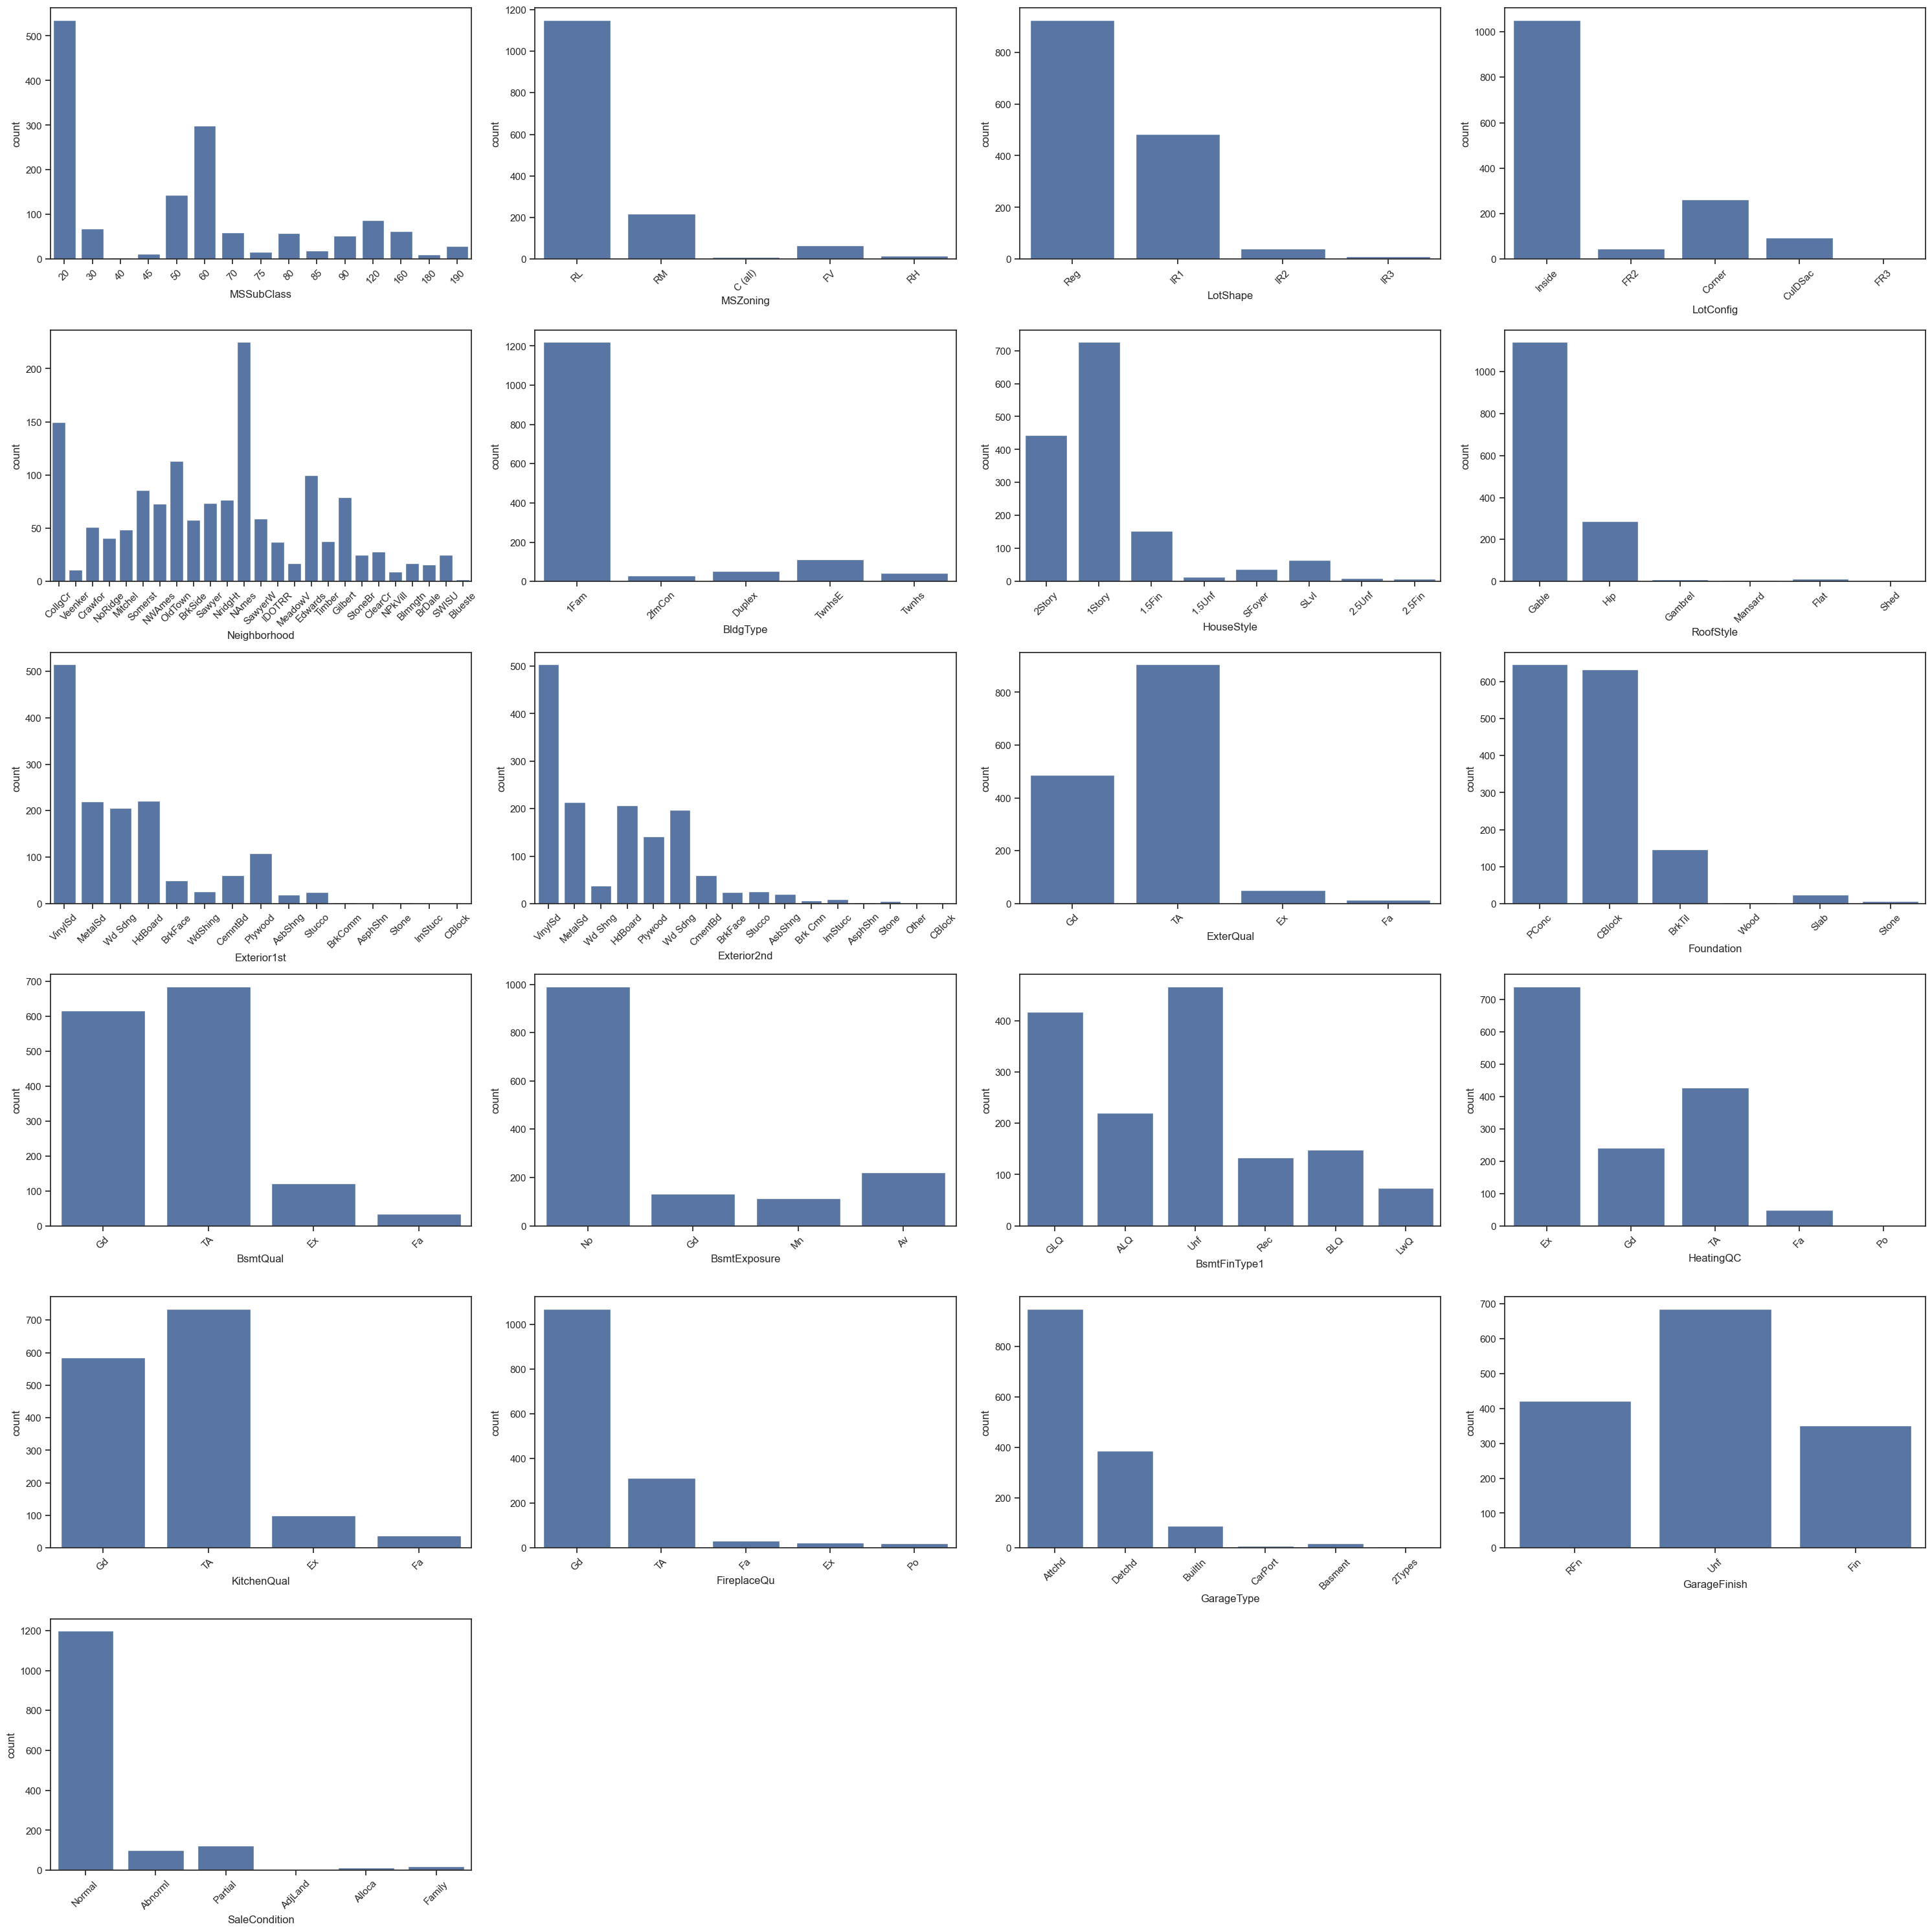

In [2213]:
num_cols = 4 
num_rows = math.ceil(len(categorical_data.columns) / num_cols)

plt.figure(figsize=(30, 30))
for i, col in enumerate(categorical_data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=col, data=categorical_data)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

### finding the correlation for numeric columns
If we see below, 3 columns values in red coloured cell indicating very high correlation. We can drop them<br>
TotalBSTSF with 1stFlrSF = 0.82<br>
TotRmsAbvGrd with GrLivArea = 0.83<br>
GarageArea with GarageCars = 0.88<br>


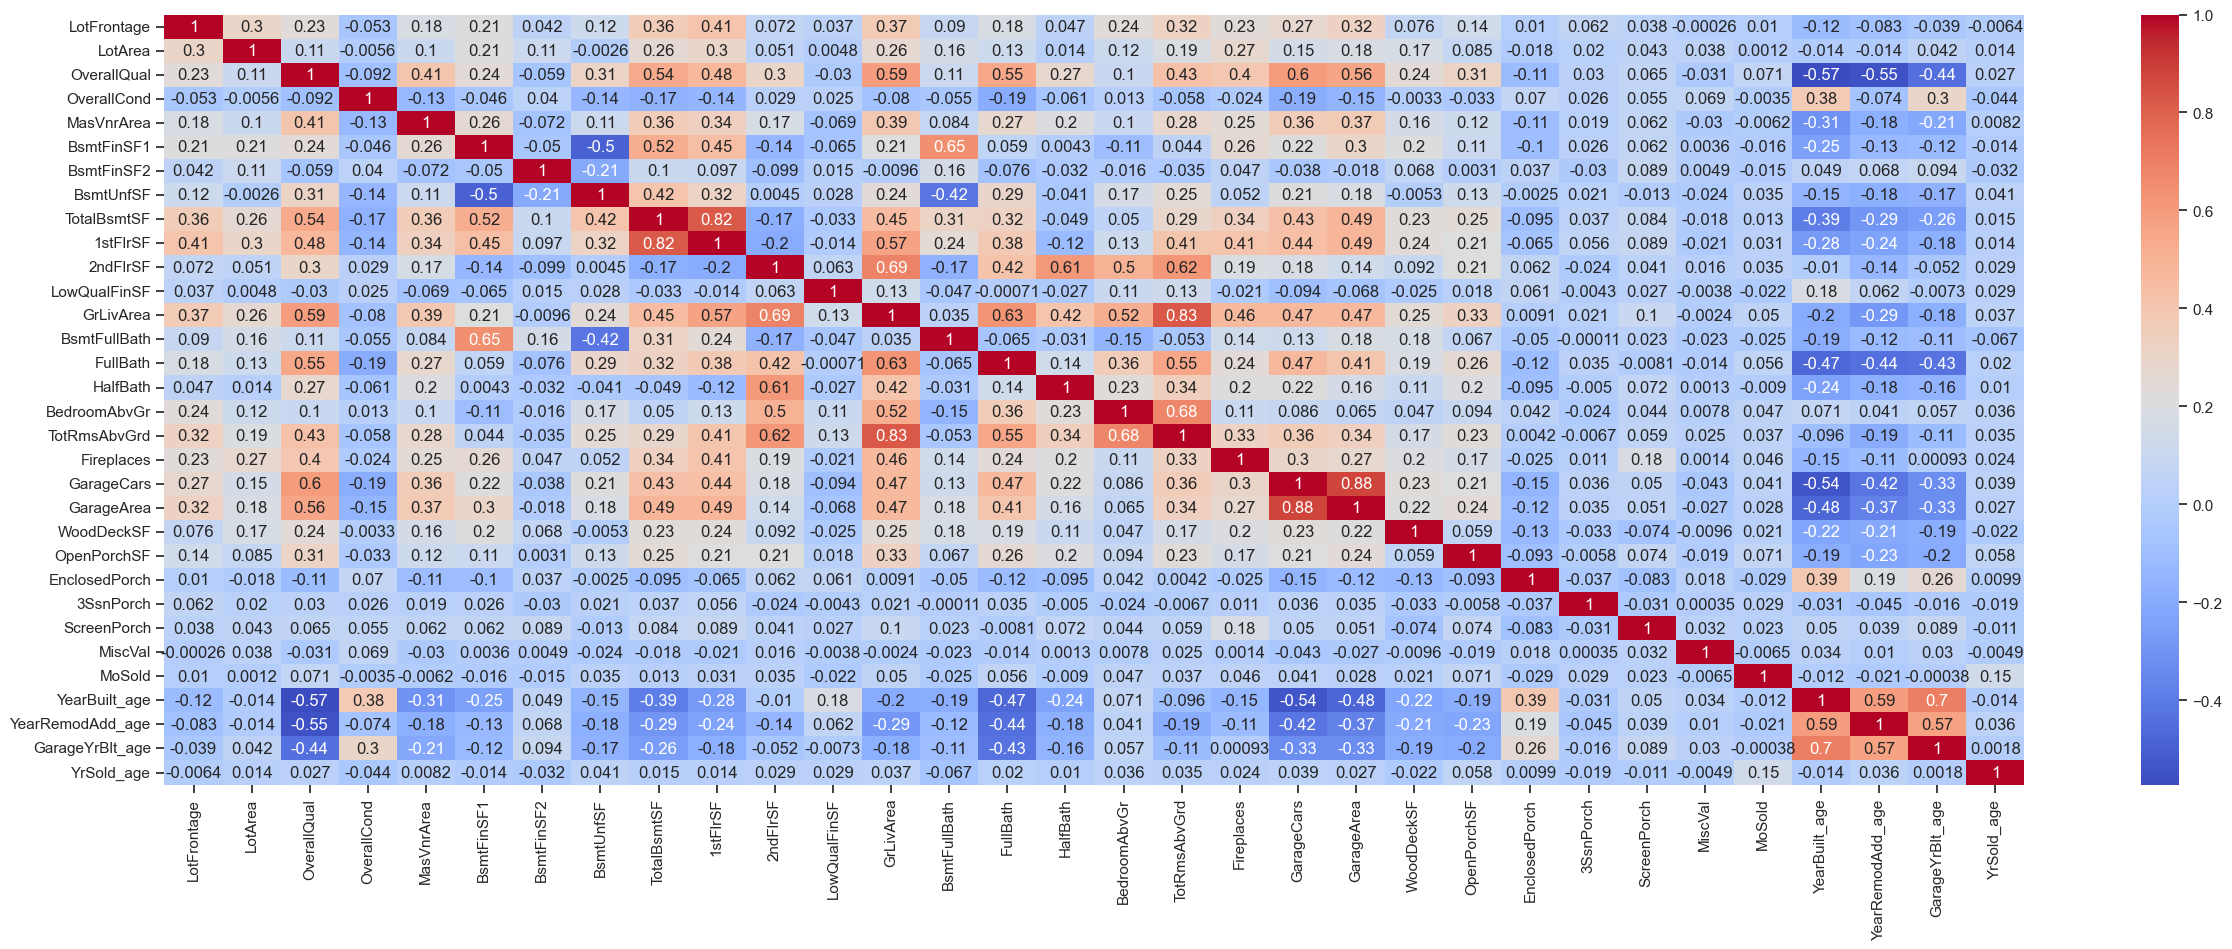

In [2214]:
numeric_columns = X.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
plt.figure(figsize = (30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [2215]:
X.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF'], axis = 1, inplace = True)

### revisiting correlation heatmap

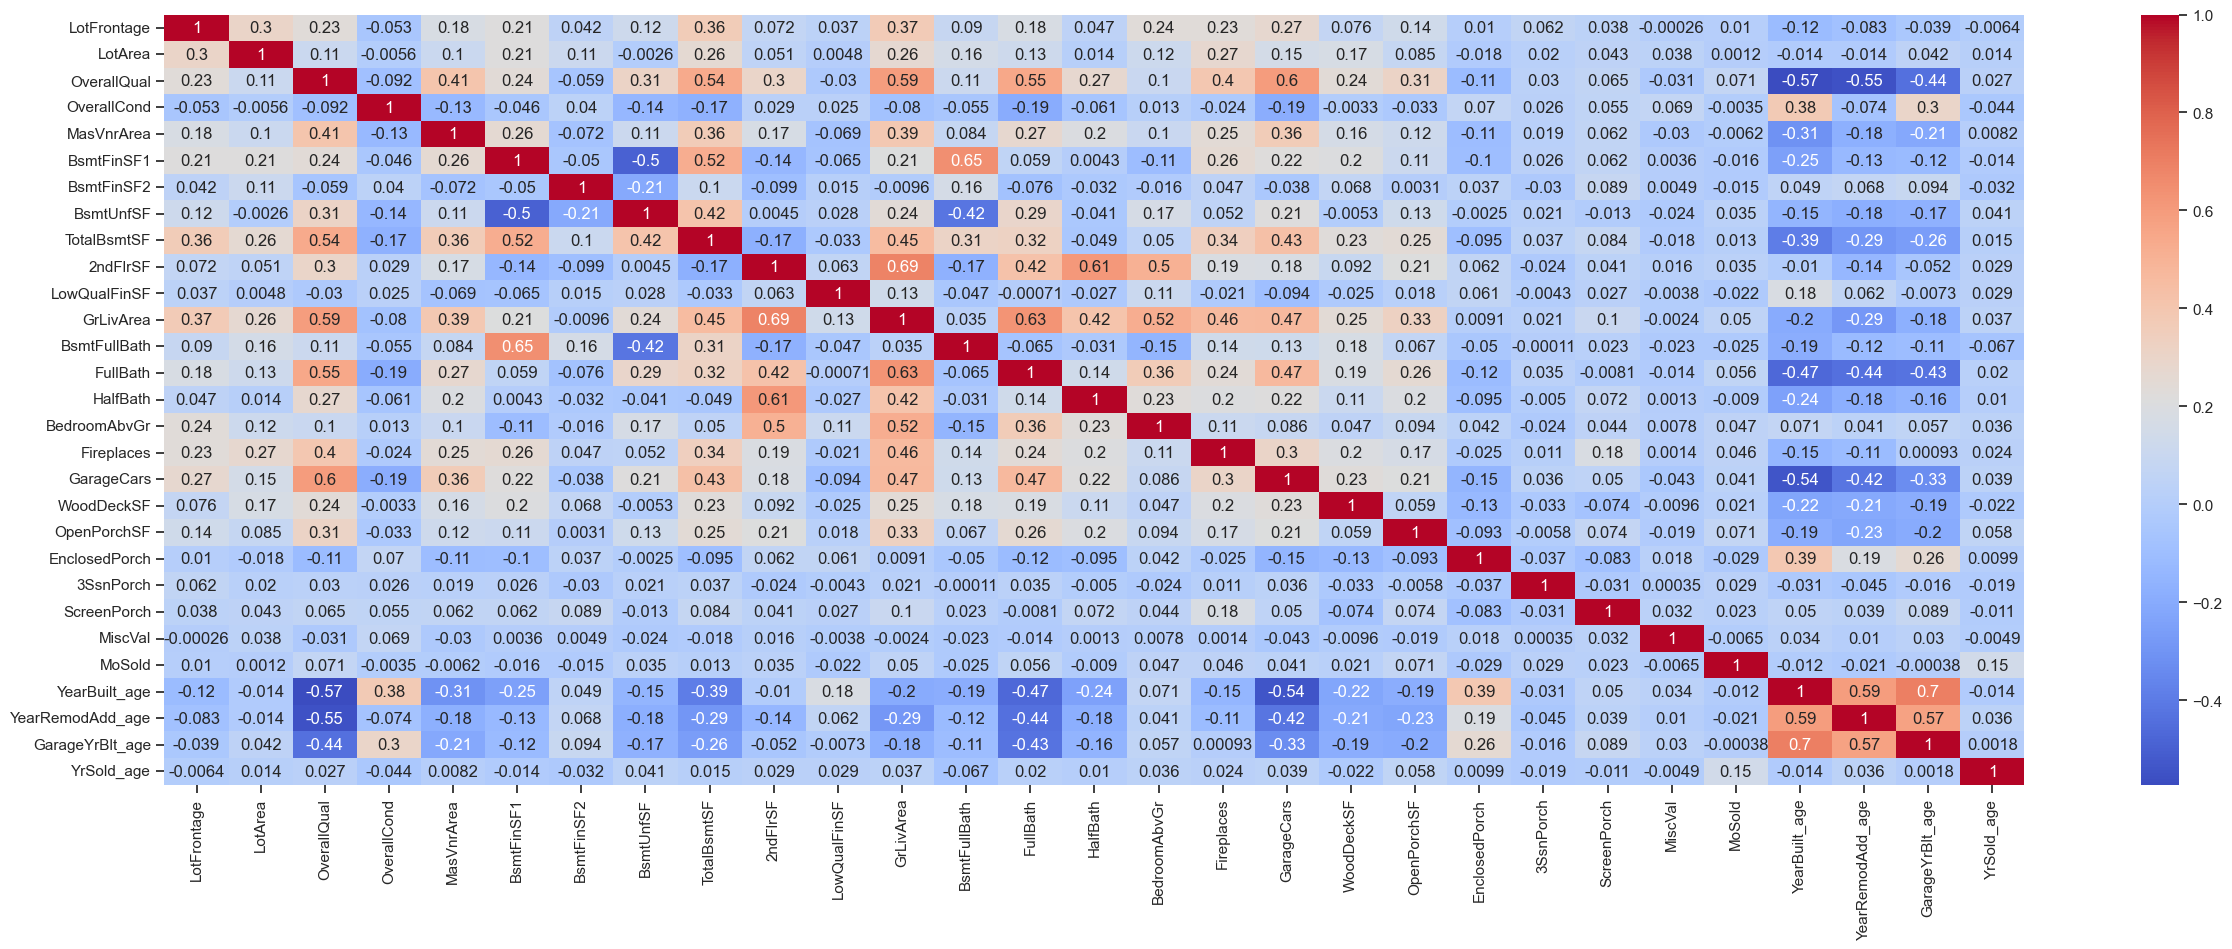

In [2216]:
numeric_columns = X.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
plt.figure(figsize = (30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

### final dataset, columns got reduced to 50 from 81 count

In [2217]:
print('number of columns ',len(X.columns), 'shape ', X.shape)

number of columns  50 shape  (1460, 50)


In [2218]:
x_num = X.select_dtypes(include='number')
x_cat = X.select_dtypes(include='object')
print('numeric columns ', x_num.columns, len(x_num.columns))
print('catgorical columns ', x_cat.columns, len(x_cat.columns))

numeric columns  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YearBuilt_age', 'YearRemodAdd_age', 'GarageYrBlt_age', 'YrSold_age'],
      dtype='object') 29
catgorical columns  Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object') 21


### encoding categorical columns

In [2219]:
categorical_columns = X.select_dtypes(include='object').columns.tolist()

# one-hot encoding categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_encoded.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,854,0,1710,1,2,1,3,0,2,0,61,0,0,0,0,2,21,21,21,16,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,80.0,9600,6,8,0.0,978,0,284,1262,0,0,1262,0,2,0,3,1,2,298,0,0,0,0,0,5,48,48,48,17,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,

In [2220]:
print('number of columns after encoding ',len(X_encoded.columns), 'shape of X_encoded ', X_encoded.shape)

number of columns after encoding  165 shape of X_encoded  (1460, 165)


In [2221]:
y.shape

(1460, 1)

In [2222]:
X = pd.concat([X_encoded, y], axis=1)
X.shape

(1460, 166)

In [2223]:
X['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### converting True and False to 1 and 0

In [2224]:
boolean_columns = X.select_dtypes(include='bool').columns
X[boolean_columns] = np.where(X[boolean_columns]=='False',0,1)

In [2225]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,854,0,1710,1,2,1,3,0,2,0,61,0,0,0,0,2,21,21,21,16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,0,0,1262,0,2,0,3,1,2,298,0,0,0,0,0,5,48,48,48,17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,181500
2,68.0,11250,7,5,162.0,486,0,434,920,866,0,1786,1,2,1,3,1,2,0,42,0,0,0,0,9,23,22,23,16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,223500
3,60.0,9550,7,5,0.0,216,0,540,756,756,0,1717,1,1,0,3,1,3,0,35,272,0,0,0,2,109,54,26,18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1

In [2226]:
int32_cols = X.select_dtypes(include='int32').columns
int32_cols

Index(['GarageYrBlt_age', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=137)

In [2227]:
int64_cols = X.select_dtypes(include='int64').columns
int64_cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YearBuilt_age', 'YearRemodAdd_age',
       'YrSold_age', 'SalePrice'],
      dtype='object')

### Train Test split

In [2228]:
train, test = train_test_split(X, test_size=0.3, random_state=10)
y_train=train['SalePrice']
y_test=test['SalePrice']
X_train = train.drop(['SalePrice'],axis=1)
X_test = test.drop(['SalePrice'],axis=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1022, 165) (438, 165) (1022,) (438,)


### scaling of X_train, y_train, X_test, y_train

In [2229]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# y_train_reshaped = np.array(y_train).reshape(-1, 1)
# y_test_reshaped = np.array(y_test).reshape(-1, 1)
# y_train_scaled = scaler.fit_transform(y_train_reshaped)
# y_test_scaled = scaler.transform(y_test_reshaped)

In [2230]:
print(y_test)

854     170000
381     187750
816     137000
577     164500
35      309000
301     267000
688     392000
900     110000
1251    171750
860     189950
145     130000
1335    167900
1403    282922
74      107400
731     187500
953     172000
963     239000
779     135000
56      172500
1050    176485
1373    466500
323     126175
1221    134000
1448    112000
1152    230000
775     162000
463     188700
125      84500
1399    137450
660     197900
413     115000
603     151000
498     130000
565     128000
299     158500
1337     52500
1012    165000
501     226700
981     336000
1424    144000
1015    227000
596     114504
431      79900
1382    157000
704     213000
7       200000
1253    294000
550     140000
372     125000
87      164500
518     211000
1100     60000
781     175900
1102    135000
131     244000
799     175000
958     185000
1309    179200
719     128500
1421    127500
957     132000
1211    164000
31      149350
452     204000
604     221000
1017    187500
964     21

### selecting the ranked features using RFE

In [2248]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lm = LinearRegression()


# Assuming X_train_scaled and y_train are already defined
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [2249]:
y_pred = lm.predict(X_test)
y_pred

array([2.29677259e+09, 1.11572583e+09, 1.42965821e+09, 1.56402636e+09,
       2.03810377e+09, 2.31059579e+09, 1.26658505e+09, 9.86100612e+08,
       7.66516053e+08, 1.16885645e+09, 7.70308095e+08, 1.38998167e+09,
       1.97044396e+09, 1.04096723e+09, 1.33064059e+09, 1.69115978e+09,
       1.73089216e+09, 1.36278113e+09, 8.34311118e+08, 1.27981538e+09,
       2.02517243e+09, 9.41846014e+08, 1.17581732e+09, 1.53471770e+09,
       1.92129537e+09, 8.61696902e+08, 1.65647296e+09, 8.95212011e+08,
       1.09822174e+09, 1.78348228e+09, 1.18342585e+09, 6.71506223e+08,
       1.05293641e+09, 1.15425894e+09, 1.70461995e+09, 6.13620329e+08,
       1.47012877e+09, 1.48944993e+09, 2.04331511e+09, 1.35475279e+09,
       1.33142470e+09, 7.57723422e+08, 9.09018436e+08, 1.22000378e+09,
       1.31263098e+09, 1.67825950e+09, 2.34939311e+09, 7.54274321e+08,
       9.60626521e+08, 7.56088971e+08, 1.47912625e+09, 9.43632052e+08,
       1.18440795e+09, 1.05033155e+09, 1.81944852e+09, 1.25352641e+09,
      

In [2251]:
r2score = r2_score(y_test, y_pred)
r2score

-428645187.55550987

In [2252]:
rss = np.sum(np.square(y_test-y_pred))
print('rss ',rss)
mse = mean_squared_error(y_test,y_pred)
print('mse ', mse)
rmse = mse**0.5
print('rmse ', rmse)

rss  1.09989870089477e+21
mse  2.5111842486181965e+18
rmse  1584671653.2512963


In [2245]:
# Define the alpha values for the search
params = {'alpha': np.arange(0.1, 10, 50).tolist()}
ridge = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1,n_jobs=-1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1, param_grid={'alpha': [0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)